In [26]:
import pandas as pd
from dython.nominal import associations

In [27]:
df = pd.read_csv('./dataset/train_preprocessed_imputed_unpreprocessed.csv')
df_id = df.pop('Id')
df

,CO2 Emissions(g/km),Fuel Consumption City (L/100Km),Fuel Consumption Hwy (L/100Km),Fuel Consumption Comb (L/100Km),Engine Size(L),Cylinders,Make,Vehicle Class,Transmission,Fuel Type
0,306.0,8.640000,6.140000,7.514791,3.500000,6.000000,FOLD,PICKUP TRUCK - STANDARD,A6,X
1,283.0,27.270000,30.760000,28.840000,5.300000,8.024261,CHEVO,PICKUP TRUCK - STANDARD,A6,E
2,329.0,1.700000,2.030000,1.848477,4.400000,6.974735,BMV,SUBCOMPACT,M6,Z
3,270.0,15.337423,15.900000,15.590609,2.057097,4.000000,KIO,SUV - SMALL,AS6,X
4,193.0,20.150000,6.000000,13.800000,3.000000,6.000000,BARUSU,MINICOMPACT,AS6,Z
...,...,...,...,...,...,...,...,...,...,...
137136,275.0,33.710000,7.698229,22.026432,5.023977,8.000000,BMV,SUBCOMPACT,AS8,Z
137137,166.0,6.489293,0.870000,3.961175,1.500000,4.000000,GONDA,STATION WAGON - SMALL,M6,X
137138,181.0,2.990000,8.380000,5.412550,1.800000,4.000000,NIRRAN,MID-SIZE,AV,X
137139,123.0,11.480000,0.221408,6.400000,1.800000,4.000000,TOYOTI,COMPACT,AV,X


In [28]:
# need to round cylinders also convert it into int

df["Cylinders"] = (df["Cylinders"] / 2).round() * 2
df["Cylinders"] = df["Cylinders"].astype(int)
df

,CO2 Emissions(g/km),Fuel Consumption City (L/100Km),Fuel Consumption Hwy (L/100Km),Fuel Consumption Comb (L/100Km),Engine Size(L),Cylinders,Make,Vehicle Class,Transmission,Fuel Type
0,306.0,8.640000,6.140000,7.514791,3.500000,6,FOLD,PICKUP TRUCK - STANDARD,A6,X
1,283.0,27.270000,30.760000,28.840000,5.300000,8,CHEVO,PICKUP TRUCK - STANDARD,A6,E
2,329.0,1.700000,2.030000,1.848477,4.400000,6,BMV,SUBCOMPACT,M6,Z
3,270.0,15.337423,15.900000,15.590609,2.057097,4,KIO,SUV - SMALL,AS6,X
4,193.0,20.150000,6.000000,13.800000,3.000000,6,BARUSU,MINICOMPACT,AS6,Z
...,...,...,...,...,...,...,...,...,...,...
137136,275.0,33.710000,7.698229,22.026432,5.023977,8,BMV,SUBCOMPACT,AS8,Z
137137,166.0,6.489293,0.870000,3.961175,1.500000,4,GONDA,STATION WAGON - SMALL,M6,X
137138,181.0,2.990000,8.380000,5.412550,1.800000,4,NIRRAN,MID-SIZE,AV,X
137139,123.0,11.480000,0.221408,6.400000,1.800000,4,TOYOTI,COMPACT,AV,X


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137141 entries, 0 to 137140
Data columns (total 10 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   CO2 Emissions(g/km)              137141 non-null  float64
 1   Fuel Consumption City (L/100Km)  137141 non-null  float64
 2   Fuel Consumption Hwy (L/100Km)   137141 non-null  float64
 3   Fuel Consumption Comb (L/100Km)  137141 non-null  float64
 4   Engine Size(L)                   137141 non-null  float64
 5   Cylinders                        137141 non-null  int32  
 6   Make                             137141 non-null  object 
 7   Vehicle Class                    137141 non-null  object 
 8   Transmission                     137141 non-null  object 
 9   Fuel Type                        137141 non-null  object 
dtypes: float64(5), int32(1), object(4)
memory usage: 9.9+ MB


In [30]:
df[['Make', 'Vehicle Class', 'Transmission', 'Fuel Type']] = df[['Make', 'Vehicle Class', 'Transmission', 'Fuel Type']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137141 entries, 0 to 137140
Data columns (total 10 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   CO2 Emissions(g/km)              137141 non-null  float64 
 1   Fuel Consumption City (L/100Km)  137141 non-null  float64 
 2   Fuel Consumption Hwy (L/100Km)   137141 non-null  float64 
 3   Fuel Consumption Comb (L/100Km)  137141 non-null  float64 
 4   Engine Size(L)                   137141 non-null  float64 
 5   Cylinders                        137141 non-null  int32   
 6   Make                             137141 non-null  category
 7   Vehicle Class                    137141 non-null  category
 8   Transmission                     137141 non-null  category
 9   Fuel Type                        137141 non-null  category
dtypes: category(4), float64(5), int32(1)
memory usage: 6.3 MB


c:\Users\sesar\Documents\_PROJECTS\bebass\venv31011\lib\site-packages\dython\nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
c:\Users\sesar\Documents\_PROJECTS\bebass\venv31011\lib\site-packages\dython\nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


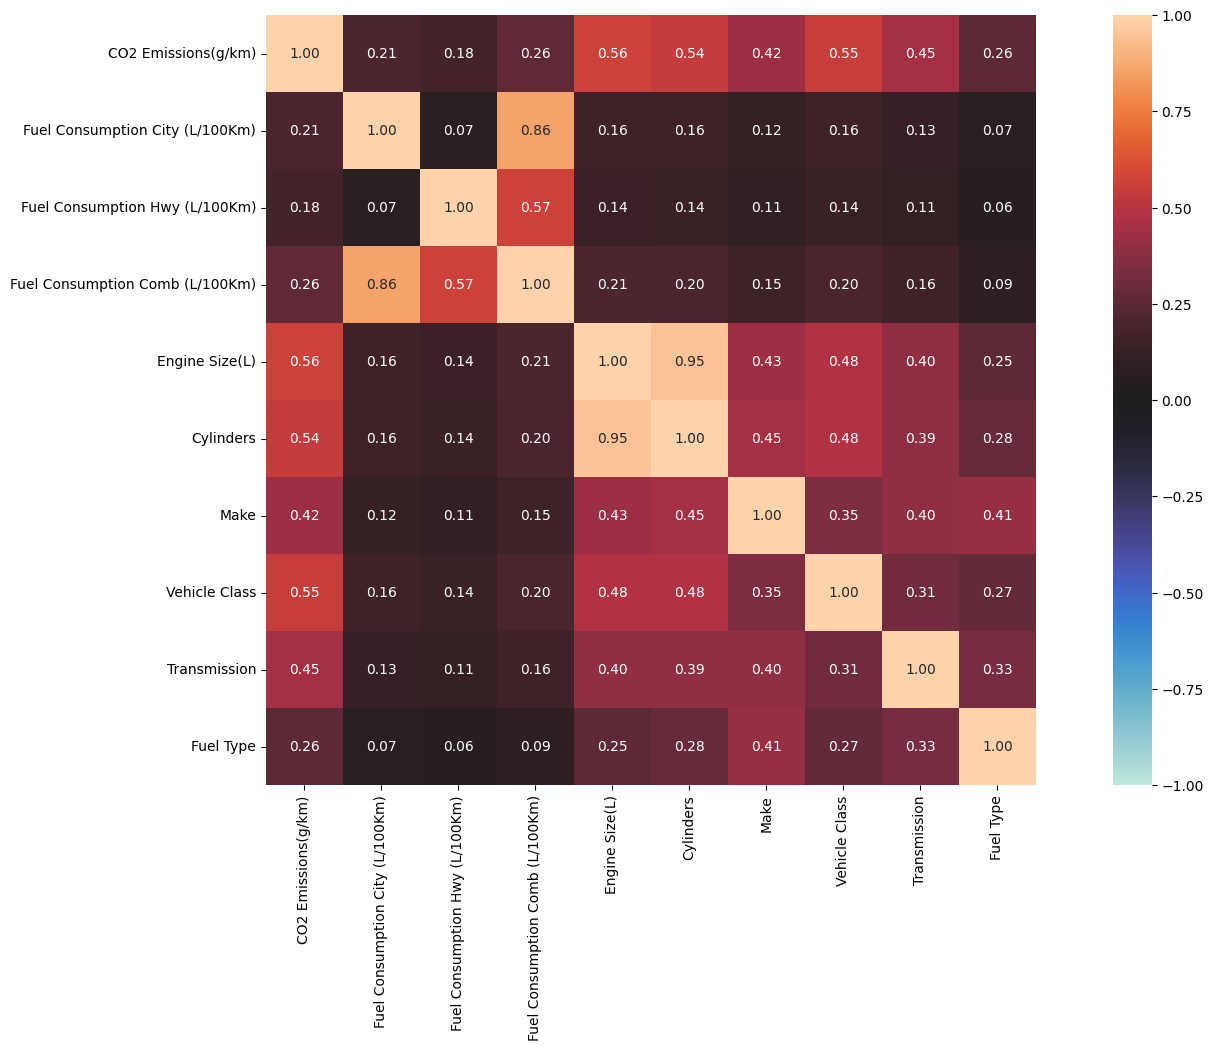

In [31]:
associations(df, figsize=(20, 10))
print()

In [ ]:
df.insert(0, 'Id', df_id)
df.to_csv('./dataset/train_preprocessed_imputed_preprocessed.csv', index=False)